In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#pd.set_option('display.max_columns', None, 'display.max_rows', None)
pd.set_option('display.max_columns', None)

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
df = pd.read_csv('./test_132.csv')

In [3]:
df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q11,Q12,Q13_1,Q14_1,Q15,Q16,Q17,QID1_1,QID1_2,QID1_3,QID1_4,QID1_5,QID1_6,QID2_1,QID2_2,QID2_3,QID2_4,QID2_5,QID2_6,QID3_1,QID3_2,QID3_3,QID3_4,QID3_5,QID3_6,QID4_1,QID4_2,QID4_3,QID4_4,QID4_5,QID4_6,QID5_1,QID5_2,QID5_3,QID5_4,QID5_5,QID5_6,QID6_1,QID6_2,QID6_3,QID6_4,QID6_5,QID6_6,QID7_1,QID7_2,QID7_3,QID7_4,QID7_5,QID7_6,QID8_1,QID8_2,QID8_3,QID8_4,QID8_5,QID8_6,QID9_1,QID9_2,QID9_3,QID9_4,QID9_5,QID9_6,QID10_1,QID10_2,QID10_3,QID10_4,QID10_5,QID10_6
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,Recipient First Name,Recipient Email,External Data Reference,Location Latitude,Location Longitude,Distribution Channel,User Language,Is\nEnglish one of your native languages?,Is\nItalian one of your native languages?,Rate your English proficiency from 0 to 100. -...,How much do you use English on a daily basis? ...,Do you have any listening impairment?,How old are you? (in years),Are\nyou familiar with evaluating synthesised ...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural are the following speech recording...,How natural are the following speech recording...,How natural are the following speech recording...,How natural are the following speech recording...,How natural are the following speech recording...,How natural are the following speech recording...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesised speec...,How natural do the following synthesis

In [4]:
# dropping useless columns
df.drop(['Progress', 'StartDate', "UserLanguage", 'EndDate', "Status", "IPAddress", "ResponseId", "RecipientLastName", "RecipientFirstName", "RecipientEmail", "ExternalReference", "RecordedDate", "LocationLatitude", "LocationLongitude", "DistributionChannel"], axis=1, inplace=True)

# eliminating the first two rows (not concerning participants' data)
df.drop([0,1], inplace=True)

In [5]:
# renaming columns
df = df.rename(columns={"Q11": "native_English", "Q12": "native_Italian", "Q13_1": "Eng_proficiency", "Q14_1": "Eng_use", "Q15": "impairment", "Q16": "age", "Q17":"familiar"})
df


,Duration (in seconds),Finished,native_English,native_Italian,Eng_proficiency,Eng_use,impairment,age,familiar,QID1_1,QID1_2,QID1_3,QID1_4,QID1_5,QID1_6,QID2_1,QID2_2,QID2_3,QID2_4,QID2_5,QID2_6,QID3_1,QID3_2,QID3_3,QID3_4,QID3_5,QID3_6,QID4_1,QID4_2,QID4_3,QID4_4,QID4_5,QID4_6,QID5_1,QID5_2,QID5_3,QID5_4,QID5_5,QID5_6,QID6_1,QID6_2,QID6_3,QID6_4,QID6_5,QID6_6,QID7_1,QID7_2,QID7_3,QID7_4,QID7_5,QID7_6,QID8_1,QID8_2,QID8_3,QID8_4,QID8_5,QID8_6,QID9_1,QID9_2,QID9_3,QID9_4,QID9_5,QID9_6,QID10_1,QID10_2,QID10_3,QID10_4,QID10_5,QID10_6
2,1361,True,No,Yes,87,97,No,25,Yes,53,31,88,77,8,100,50,31,71,81,13,100,78,12,65,76,29,100,34,80,69,71,14,100,65,16,31,80,46,100,24,60,52,78,7,100,33,59,83,71,18,100,51,35,63,80,12,100,26,66,38,50,3,100,44,27,54,66,9,100
3,938,True,Yes,No,100,80,No,38,Yes,25,30,60,70,15,100,20,20,80,50,40,100,85,35,80,65,20,100,45,40,65,55,30,100,45,65,59,50,35,100,40,75,65,50,25,100,35,60,45,55,20,100,40,30,65,50,20,100,25,35,40,65,15,100,25,35,40,50,10,100
4,562,True,No,Yes,70,40,No,25,No,40,30,40,60,20,100,50,40,60,40,30,100,50,30,80,60,20,100,30,50,60,40,30,100,40,50,40,50,50,100,50,40,40,30,20,100,30,30,40,40,30,100,50,60,40,20,20,100,30,60,50,50,20,100,40,80,50,50,50,100
5,667,True,No,No,75,81,No,23,Yes,40,13,49,54,29,100,38,17,49,60,28,100,68,16,39,50,28,100,20,49,39,31,9,100,29,21,49,59,36,100,23,34,46,14,8,100,30,49,22,39,8,100,18,28,38,49,6,100,3,33,59,19,8,100,24,43,34,54,8,100
6,1995,True,No,Yes,82,10,No,25,No,37,24,59,48,32,100,68,44,86,80,8,100,65,12,80,50,29,100,3,60,80,70,3,100,25,19,4,30,35,100,10,19,26,24,5,100,25,65,13,42,1,100,11,10,23,55,15,100,1,43,9,23,4,100,39,81,29,70,8,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,848,True,No,Yes,75,37,No,27,No,14,8,44,32,22,100,46,18,31,30,8,100,38,24,55,86,8,100,17,29,51,39,9,100,39,8,31,19,26,100,24,61,50,31,8,100,47,18,29,35,5,100,9,28,38,50,7,100,14,30,21,36,43,100,18,29,50,38,8,100
130,960,True,Yes,No,100,100,No,35,No,31,4,12,46,10,100,28,16,41,53,11,100,30,11,43,32,23,100,13,32,21,41,8,100,17,16,33,24,5,100,18,40,29,19,7,100,4,23,13,20,3,100,7,18,26,61,34,100,4,7,14,19,10,100,26,16,22,14,6,100
131,21714,False,Yes,No,88,34,No,27,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,29,29,29,5,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,1692,True,No,Yes,90,100,No,45,No,20,5,45,50,7,100,30,25,45,70,20,100,85,10,78,75,5,100,10,38,40,50,5,100,20,18,15,50,35,100,3,50,45,30,5,100,3,40,10,9,2,100,30,35,20,60,5,100,2,20,15,30,1,100,15,60,25,10,2,100


In [6]:
print('Finished: ',len(df[df["Finished"] == 'True']))

# eliminating Nan values
nan_value = float("NaN")

df.replace("", nan_value, inplace=True)

df = df.dropna()

df.drop(['Finished'], axis=1, inplace=True)

df

Finished:  104


,Duration (in seconds),native_English,native_Italian,Eng_proficiency,Eng_use,impairment,age,familiar,QID1_1,QID1_2,QID1_3,QID1_4,QID1_5,QID1_6,QID2_1,QID2_2,QID2_3,QID2_4,QID2_5,QID2_6,QID3_1,QID3_2,QID3_3,QID3_4,QID3_5,QID3_6,QID4_1,QID4_2,QID4_3,QID4_4,QID4_5,QID4_6,QID5_1,QID5_2,QID5_3,QID5_4,QID5_5,QID5_6,QID6_1,QID6_2,QID6_3,QID6_4,QID6_5,QID6_6,QID7_1,QID7_2,QID7_3,QID7_4,QID7_5,QID7_6,QID8_1,QID8_2,QID8_3,QID8_4,QID8_5,QID8_6,QID9_1,QID9_2,QID9_3,QID9_4,QID9_5,QID9_6,QID10_1,QID10_2,QID10_3,QID10_4,QID10_5,QID10_6
2,1361,No,Yes,87,97,No,25,Yes,53,31,88,77,8,100,50,31,71,81,13,100,78,12,65,76,29,100,34,80,69,71,14,100,65,16,31,80,46,100,24,60,52,78,7,100,33,59,83,71,18,100,51,35,63,80,12,100,26,66,38,50,3,100,44,27,54,66,9,100
3,938,Yes,No,100,80,No,38,Yes,25,30,60,70,15,100,20,20,80,50,40,100,85,35,80,65,20,100,45,40,65,55,30,100,45,65,59,50,35,100,40,75,65,50,25,100,35,60,45,55,20,100,40,30,65,50,20,100,25,35,40,65,15,100,25,35,40,50,10,100
4,562,No,Yes,70,40,No,25,No,40,30,40,60,20,100,50,40,60,40,30,100,50,30,80,60,20,100,30,50,60,40,30,100,40,50,40,50,50,100,50,40,40,30,20,100,30,30,40,40,30,100,50,60,40,20,20,100,30,60,50,50,20,100,40,80,50,50,50,100
5,667,No,No,75,81,No,23,Yes,40,13,49,54,29,100,38,17,49,60,28,100,68,16,39,50,28,100,20,49,39,31,9,100,29,21,49,59,36,100,23,34,46,14,8,100,30,49,22,39,8,100,18,28,38,49,6,100,3,33,59,19,8,100,24,43,34,54,8,100
6,1995,No,Yes,82,10,No,25,No,37,24,59,48,32,100,68,44,86,80,8,100,65,12,80,50,29,100,3,60,80,70,3,100,25,19,4,30,35,100,10,19,26,24,5,100,25,65,13,42,1,100,11,10,23,55,15,100,1,43,9,23,4,100,39,81,29,70,8,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,922,No,Yes,50,35,No,25,No,39,8,39,29,8,100,45,25,70,60,10,100,60,8,60,70,28,100,55,35,40,75,10,100,28,50,18,55,60,100,40,48,60,50,30,100,35,45,40,33,10,100,30,15,40,50,20,100,25,40,30,45,15,100,35,45,55,30,10,100
129,848,No,Yes,75,37,No,27,No,14,8,44,32,22,100,46,18,31,30,8,100,38,24,55,86,8,100,17,29,51,39,9,100,39,8,31,19,26,100,24,61,50,31,8,100,47,18,29,35,5,100,9,28,38,50,7,100,14,30,21,36,43,100,18,29,50,38,8,100
130,960,Yes,No,100,100,No,35,No,31,4,12,46,10,100,28,16,41,53,11,100,30,11,43,32,23,100,13,32,21,41,8,100,17,16,33,24,5,100,18,40,29,19,7,100,4,23,13,20,3,100,7,18,26,61,34,100,4,7,14,19,10,100,26,16,22,14,6,100
132,1692,No,Yes,90,100,No,45,No,20,5,45,50,7,100,30,25,45,70,20,100,85,10,78,75,5,100,10,38,40,50,5,100,20,18,15,50,35,100,3,50,45,30,5,100,3,40,10,9,2,100,30,35,20,60,5,100,2,20,15,30,1,100,15,60,25,10,2,100


In [7]:
# how many familiar with TTS
familiar = df[df["familiar"] == 'Yes']
len(familiar)
print("Native ENG familiar with TTS: ", len(familiar[familiar["native_English"] == "Yes"]))
print("Non-native familiar with TTS: ", len(familiar[familiar["native_English"] == "No"]))

Native ENG familiar with TTS:  9
Non-native familiar with TTS:  14


In [8]:
# any impairment: remove them
df.drop(df[(df['impairment'] == 'Yes') & (df['native_Italian'] == 'Yes')].index, inplace = True)

df.drop(['impairment'], axis=1, inplace=True)

# weird response
df.drop(106, inplace = True )
df.drop(23, inplace = True )
df.drop(33, inplace = True)
df.drop(36, inplace = True)
df.drop(37, inplace = True)
df.drop(71, inplace = True)


In [9]:
# how long did it take to do the test? 
mean_duration = df["Duration (in seconds)"].astype("int").mean()
print("Mean duration in seconds: ", mean_duration)
print("STD duration in seconds: ", df["Duration (in seconds)"].astype("int").std())

Mean duration in seconds:  1227.1157894736841
STD duration in seconds:  942.7496662734379


In [10]:
# native speakers of English
native_eng = df[df["native_English"] == 'Yes']
print("Native speakers: ",len(native_eng))

#native_eng.groupby("native speakers").count()
print("Age of native speakers: ", round(native_eng["age"].astype("int").mean()))


Native speakers:  31
Age of native speakers:  34.0


In [11]:
# native speakers of Italian
native_ita = df[df["native_Italian"] == 'Yes']
print("Native speakers of Italian: ",len(native_ita))
print("Age of Italian native speakers: ", round(native_ita["age"].astype("int").mean()))

Native speakers of Italian:  58
Age of Italian native speakers:  40.0


In [12]:
# ITA speakers with high use of English
# subgroup of native speakers
ita_expats = native_ita[native_ita["Eng_use"].astype("int") > 50]

print("Ita expats: ",len(ita_expats))
print("Proficiency of Eng by highly-fluent speakers of Italian: ", ita_expats["Eng_proficiency"].astype("int").mean())
print("Use of Eng by highly-fluent speakers of Italian: ", ita_expats["Eng_use"].astype("int").mean())

Ita expats:  16
Proficiency of Eng by highly-fluent speakers of Italian:  81.625
Use of Eng by highly-fluent speakers of Italian:  87.625


In [13]:
# non native speakers of either language
nonnative = df[(df["native_English"] == 'No') & (df["native_Italian"] == 'No')]
print("Nonnative speakers of neither: ",len(nonnative))
print("Age of Nonnative speakers of neither: ", nonnative["age"].astype("int").mean())
print("Proficiency of Eng by nonnative speakers of neither the langs: ", nonnative["Eng_proficiency"].astype("int").mean())
print("Use of Eng by nonnative speakers of neither the langs: ", nonnative["Eng_use"].astype("int").mean())

Nonnative speakers of neither:  6
Age of Nonnative speakers of neither:  30.333333333333332
Proficiency of Eng by nonnative speakers of neither the langs:  89.0
Use of Eng by nonnative speakers of neither the langs:  95.16666666666667


In [14]:
# for analysis, division of the groups:

# ENGLISH SPEAKERS
ENG_native = df[df["native_Italian"] == 'No']

print("ENGLISH SPEAKERS: ",len(ENG_native))
print("Age of native speakers: ", round(ENG_native["age"].astype("int").mean()))
print("STD Age of native speakers: ", round(ENG_native["age"].astype("int").std()))
print("Proficiency of Eng by NATIVE speakers: ", round(ENG_native["Eng_proficiency"].astype("int").mean(),1))
print("STD Proficiency of Eng by NATIVE speakers: ", round(ENG_native["Eng_proficiency"].astype("int").std(),1))
print("Use of Eng by NATIVE speakers: ", round(ENG_native["Eng_use"].astype("int").mean(),1))
print("STD Use of Eng by NATIVE speakers: ", round(ENG_native["Eng_use"].astype("int").std(),1))

# ITALIAN SPEAKERS
ITA_native = native_ita[native_ita["Eng_use"].astype("int") < 50]
ITA_native_good = ITA_native[ITA_native["Eng_proficiency"].astype("int") > 40] # change this if necessary

print("\nITALIAN SPEAKERS: ",len(ITA_native_good))
print("Age of Italians: ", round(ITA_native_good["age"].astype("int").mean()))
print("STD Age of Italians: ", round(ITA_native_good["age"].astype("int").std()))
print("Proficiency of Italians: ", round(ITA_native_good["Eng_proficiency"].astype("int").mean(),1))
print("STDProficiency of Italians: ", round(ITA_native_good["Eng_proficiency"].astype("int").std(),1))
print("Use of Eng by Italians: ", round(ITA_native_good["Eng_use"].astype("int").mean(),1))
print("STD Use of Eng by Italians: ", round(ITA_native_good["Eng_use"].astype("int").std(),1))

# ITALIAN EXPATS
ITA_expats = native_ita[native_ita["Eng_use"].astype("int") > 50]

print("\nITALIAN EXPATS: ",len(ITA_expats))
print("Age of Expats: ", round(ITA_expats["age"].astype("int").mean()))
print("STD Age of Expats: ", round(ITA_expats["age"].astype("int").std()))
print("Proficiency of Eng by highly-fluent speakers of Italian: ", round(ITA_expats["Eng_proficiency"].astype("int").mean(),1))
print("STD Proficiency of Eng by highly-fluent speakers of Italian: ", round(ITA_expats["Eng_proficiency"].astype("int").std(),1))
print("Use of Eng by highly-fluent speakers of Italian: ", round(ITA_expats["Eng_use"].astype("int").mean(),1))
print("STD Use of Eng by highly-fluent speakers of Italian: ", round(ITA_expats["Eng_use"].astype("int").std(),1))

ENGLISH SPEAKERS:  37
Age of native speakers:  34.0
STD Age of native speakers:  11.0
Proficiency of Eng by NATIVE speakers:  96.2
STD Proficiency of Eng by NATIVE speakers:  5.9
Use of Eng by NATIVE speakers:  87.3
STD Use of Eng by NATIVE speakers:  21.1

ITALIAN SPEAKERS:  30
Age of Italians:  40.0
STD Age of Italians:  17.0
Proficiency of Italians:  64.4
STDProficiency of Italians:  12.9
Use of Eng by Italians:  19.2
STD Use of Eng by Italians:  13.7

ITALIAN EXPATS:  16
Age of Expats:  34.0
STD Age of Expats:  14.0
Proficiency of Eng by highly-fluent speakers of Italian:  81.6
STD Proficiency of Eng by highly-fluent speakers of Italian:  11.1
Use of Eng by highly-fluent speakers of Italian:  87.6
STD Use of Eng by highly-fluent speakers of Italian:  11.6


In [15]:
familiar = df[df["familiar"] == 'Yes']
len(familiar)
print("Native ENG familiar with TTS: ", len(familiar[familiar["native_English"] == "Yes"]))
print("Non-native familiar with TTS: ", len(familiar[familiar["native_English"] == "No"]))

Native ENG familiar with TTS:  8
Non-native familiar with TTS:  12


In [16]:
conditions = [
    (df["native_Italian"] == 'No'),
    (df["native_Italian"] == 'Yes') & (df["Eng_use"].astype("int") <= 50) & (df["Eng_proficiency"].astype("int") > 40),
    (df["native_Italian"] == 'Yes') & (df["Eng_use"].astype("int") > 50)
    ]


# create a list of the values we want to assign for each condition
values = ['ENG', 'ITA', 'ITA_EXP']

# create a new column and use np.select to assign values to it using our lists as arguments
df['language'] = np.select(conditions, values)

# shift
moving_column = df.pop('language')
  
# insert column using insert(position,column_name,
# first_column) function
df.insert(1, 'language', moving_column)
df

,Duration (in seconds),language,native_English,native_Italian,Eng_proficiency,Eng_use,age,familiar,QID1_1,QID1_2,QID1_3,QID1_4,QID1_5,QID1_6,QID2_1,QID2_2,QID2_3,QID2_4,QID2_5,QID2_6,QID3_1,QID3_2,QID3_3,QID3_4,QID3_5,QID3_6,QID4_1,QID4_2,QID4_3,QID4_4,QID4_5,QID4_6,QID5_1,QID5_2,QID5_3,QID5_4,QID5_5,QID5_6,QID6_1,QID6_2,QID6_3,QID6_4,QID6_5,QID6_6,QID7_1,QID7_2,QID7_3,QID7_4,QID7_5,QID7_6,QID8_1,QID8_2,QID8_3,QID8_4,QID8_5,QID8_6,QID9_1,QID9_2,QID9_3,QID9_4,QID9_5,QID9_6,QID10_1,QID10_2,QID10_3,QID10_4,QID10_5,QID10_6
2,1361,ITA_EXP,No,Yes,87,97,25,Yes,53,31,88,77,8,100,50,31,71,81,13,100,78,12,65,76,29,100,34,80,69,71,14,100,65,16,31,80,46,100,24,60,52,78,7,100,33,59,83,71,18,100,51,35,63,80,12,100,26,66,38,50,3,100,44,27,54,66,9,100
3,938,ENG,Yes,No,100,80,38,Yes,25,30,60,70,15,100,20,20,80,50,40,100,85,35,80,65,20,100,45,40,65,55,30,100,45,65,59,50,35,100,40,75,65,50,25,100,35,60,45,55,20,100,40,30,65,50,20,100,25,35,40,65,15,100,25,35,40,50,10,100
4,562,ITA,No,Yes,70,40,25,No,40,30,40,60,20,100,50,40,60,40,30,100,50,30,80,60,20,100,30,50,60,40,30,100,40,50,40,50,50,100,50,40,40,30,20,100,30,30,40,40,30,100,50,60,40,20,20,100,30,60,50,50,20,100,40,80,50,50,50,100
5,667,ENG,No,No,75,81,23,Yes,40,13,49,54,29,100,38,17,49,60,28,100,68,16,39,50,28,100,20,49,39,31,9,100,29,21,49,59,36,100,23,34,46,14,8,100,30,49,22,39,8,100,18,28,38,49,6,100,3,33,59,19,8,100,24,43,34,54,8,100
6,1995,ITA,No,Yes,82,10,25,No,37,24,59,48,32,100,68,44,86,80,8,100,65,12,80,50,29,100,3,60,80,70,3,100,25,19,4,30,35,100,10,19,26,24,5,100,25,65,13,42,1,100,11,10,23,55,15,100,1,43,9,23,4,100,39,81,29,70,8,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,922,ITA,No,Yes,50,35,25,No,39,8,39,29,8,100,45,25,70,60,10,100,60,8,60,70,28,100,55,35,40,75,10,100,28,50,18,55,60,100,40,48,60,50,30,100,35,45,40,33,10,100,30,15,40,50,20,100,25,40,30,45,15,100,35,45,55,30,10,100
129,848,ITA,No,Yes,75,37,27,No,14,8,44,32,22,100,46,18,31,30,8,100,38,24,55,86,8,100,17,29,51,39,9,100,39,8,31,19,26,100,24,61,50,31,8,100,47,18,29,35,5,100,9,28,38,50,7,100,14,30,21,36,43,100,18,29,50,38,8,100
130,960,ENG,Yes,No,100,100,35,No,31,4,12,46,10,100,28,16,41,53,11,100,30,11,43,32,23,100,13,32,21,41,8,100,17,16,33,24,5,100,18,40,29,19,7,100,4,23,13,20,3,100,7,18,26,61,34,100,4,7,14,19,10,100,26,16,22,14,6,100
132,1692,ITA_EXP,No,Yes,90,100,45,No,20,5,45,50,7,100,30,25,45,70,20,100,85,10,78,75,5,100,10,38,40,50,5,100,20,18,15,50,35,100,3,50,45,30,5,100,3,40,10,9,2,100,30,35,20,60,5,100,2,20,15,30,1,100,15,60,25,10,2,100


In [17]:
# need to eliminate participants that i don't use -- Italians with low proficiecy
indexNames = ITA_native[ITA_native['Eng_proficiency'].astype("int") <= 40 ].index # change this if necessary
# Delete these row indexes from dataFrame
df.drop(indexNames ,inplace=True)

In [18]:
df

,Duration (in seconds),language,native_English,native_Italian,Eng_proficiency,Eng_use,age,familiar,QID1_1,QID1_2,QID1_3,QID1_4,QID1_5,QID1_6,QID2_1,QID2_2,QID2_3,QID2_4,QID2_5,QID2_6,QID3_1,QID3_2,QID3_3,QID3_4,QID3_5,QID3_6,QID4_1,QID4_2,QID4_3,QID4_4,QID4_5,QID4_6,QID5_1,QID5_2,QID5_3,QID5_4,QID5_5,QID5_6,QID6_1,QID6_2,QID6_3,QID6_4,QID6_5,QID6_6,QID7_1,QID7_2,QID7_3,QID7_4,QID7_5,QID7_6,QID8_1,QID8_2,QID8_3,QID8_4,QID8_5,QID8_6,QID9_1,QID9_2,QID9_3,QID9_4,QID9_5,QID9_6,QID10_1,QID10_2,QID10_3,QID10_4,QID10_5,QID10_6
2,1361,ITA_EXP,No,Yes,87,97,25,Yes,53,31,88,77,8,100,50,31,71,81,13,100,78,12,65,76,29,100,34,80,69,71,14,100,65,16,31,80,46,100,24,60,52,78,7,100,33,59,83,71,18,100,51,35,63,80,12,100,26,66,38,50,3,100,44,27,54,66,9,100
3,938,ENG,Yes,No,100,80,38,Yes,25,30,60,70,15,100,20,20,80,50,40,100,85,35,80,65,20,100,45,40,65,55,30,100,45,65,59,50,35,100,40,75,65,50,25,100,35,60,45,55,20,100,40,30,65,50,20,100,25,35,40,65,15,100,25,35,40,50,10,100
4,562,ITA,No,Yes,70,40,25,No,40,30,40,60,20,100,50,40,60,40,30,100,50,30,80,60,20,100,30,50,60,40,30,100,40,50,40,50,50,100,50,40,40,30,20,100,30,30,40,40,30,100,50,60,40,20,20,100,30,60,50,50,20,100,40,80,50,50,50,100
5,667,ENG,No,No,75,81,23,Yes,40,13,49,54,29,100,38,17,49,60,28,100,68,16,39,50,28,100,20,49,39,31,9,100,29,21,49,59,36,100,23,34,46,14,8,100,30,49,22,39,8,100,18,28,38,49,6,100,3,33,59,19,8,100,24,43,34,54,8,100
6,1995,ITA,No,Yes,82,10,25,No,37,24,59,48,32,100,68,44,86,80,8,100,65,12,80,50,29,100,3,60,80,70,3,100,25,19,4,30,35,100,10,19,26,24,5,100,25,65,13,42,1,100,11,10,23,55,15,100,1,43,9,23,4,100,39,81,29,70,8,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,922,ITA,No,Yes,50,35,25,No,39,8,39,29,8,100,45,25,70,60,10,100,60,8,60,70,28,100,55,35,40,75,10,100,28,50,18,55,60,100,40,48,60,50,30,100,35,45,40,33,10,100,30,15,40,50,20,100,25,40,30,45,15,100,35,45,55,30,10,100
129,848,ITA,No,Yes,75,37,27,No,14,8,44,32,22,100,46,18,31,30,8,100,38,24,55,86,8,100,17,29,51,39,9,100,39,8,31,19,26,100,24,61,50,31,8,100,47,18,29,35,5,100,9,28,38,50,7,100,14,30,21,36,43,100,18,29,50,38,8,100
130,960,ENG,Yes,No,100,100,35,No,31,4,12,46,10,100,28,16,41,53,11,100,30,11,43,32,23,100,13,32,21,41,8,100,17,16,33,24,5,100,18,40,29,19,7,100,4,23,13,20,3,100,7,18,26,61,34,100,4,7,14,19,10,100,26,16,22,14,6,100
132,1692,ITA_EXP,No,Yes,90,100,45,No,20,5,45,50,7,100,30,25,45,70,20,100,85,10,78,75,5,100,10,38,40,50,5,100,20,18,15,50,35,100,3,50,45,30,5,100,3,40,10,9,2,100,30,35,20,60,5,100,2,20,15,30,1,100,15,60,25,10,2,100


In [19]:
lm_age = ols('age ~ C(language)', data=df).fit()
print(lm_age.summary())

# Seeing if the overall model is significant
print(f"\nOverall model F({lm_age.df_model: .0f},{lm_age.df_resid: .0f}) = {lm_age.fvalue: .3f}, p = {lm_age.f_pvalue: .4f}")


# Creates the ANOVA table
aov_table = sm.stats.anova_lm(lm_age, typ=2)
print(aov_table.round(4))

#mc = statsmodels.stats.multicomp.MultiComparison(df1['voice'],df1['language'])

mc = statsmodels.stats.multicomp.MultiComparison(df['age'],df['language'])
mc = mc.tukeyhsd()
print(mc)


NameError: name 'ols' is not defined

In [20]:
import scipy.stats as stats
#import os
#import random

import statsmodels.api as sm
import statsmodels.stats.multicomp

from statsmodels.formula.api import ols
#from statsmodels.stats.anova import anova_lm
#import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns

In [21]:
columns_recipes = ['QID1_1', 'QID2_1', 'QID3_1', 'QID4_1', 'QID5_1']
columns_general = ['QID6_1', 'QID7_1', 'QID8_1', 'QID9_1', 'QID10_1']

# creating all the columns

df['R200_rec'] = (df['QID1_1'].astype("int") + df['QID2_1'].astype("int") + df['QID3_1'].astype("int") + df['QID4_1'].astype("int") + df['QID5_1'].astype("int"))/5
df['R200_gen'] = (df['QID6_1'].astype("int")+ df['QID7_1'].astype("int")+ df['QID8_1'].astype("int")+ df['QID9_1'].astype("int")+ df['QID10_1'].astype("int"))/5

df['A_rec'] = (df['QID1_2'].astype("int") + df['QID2_2'].astype("int") + df['QID3_2'].astype("int") + df['QID4_2'].astype("int") + df['QID5_2'].astype("int"))/5
df['A_gen'] = (df['QID6_2'].astype("int")+ df['QID7_2'].astype("int")+ df['QID8_2'].astype("int")+ df['QID9_2'].astype("int")+ df['QID10_2'].astype("int"))/5

df['R_rec'] = (df['QID1_3'].astype("int") + df['QID2_3'].astype("int") + df['QID3_3'].astype("int") + df['QID4_3'].astype("int") + df['QID5_3'].astype("int"))/5
df['R_gen'] = (df['QID6_3'].astype("int")+ df['QID7_3'].astype("int")+ df['QID8_3'].astype("int")+ df['QID9_3'].astype("int")+ df['QID10_3'].astype("int"))/5

df['A+R_rec'] = (df['QID1_4'].astype("int") + df['QID2_4'].astype("int") + df['QID3_4'].astype("int") + df['QID4_4'].astype("int") + df['QID5_4'].astype("int"))/5
df['A+R_gen'] = (df['QID6_4'].astype("int")+ df['QID7_4'].astype("int")+ df['QID8_4'].astype("int")+ df['QID9_4'].astype("int")+ df['QID10_4'].astype("int"))/5

df['ARed_rec'] = (df['QID1_5'].astype("int") + df['QID2_5'].astype("int") + df['QID3_5'].astype("int") + df['QID4_5'].astype("int") + df['QID5_5'].astype("int"))/5
df['ARed_gen'] = (df['QID6_5'].astype("int")+ df['QID7_5'].astype("int")+ df['QID8_5'].astype("int")+ df['QID9_5'].astype("int")+ df['QID10_5'].astype("int"))/5


print("Mean of groups: ",round(df.groupby('language').mean(),2))
print("\nSD of groups: ",round(df.groupby('language').std(),2))


Mean of groups:            R200_rec  R200_gen  A_rec  A_gen  R_rec  R_gen  A+R_rec  A+R_gen  \
language                                                                     
ENG          43.75     30.90  36.53  43.87  53.65  41.34    57.19    45.71   
ITA          35.13     25.15  26.99  37.74  43.32  36.49    44.68    41.88   
ITA_EXP      42.85     28.68  31.32  40.40  51.34  39.49    57.76    46.59   

          ARed_rec  ARed_gen  
language                      
ENG          30.62     17.18  
ITA          22.63     14.77  
ITA_EXP      27.60     16.84  

SD of groups:            R200_rec  R200_gen  A_rec  A_gen  R_rec  R_gen  A+R_rec  A+R_gen  \
language                                                                     
ENG          15.74     16.07  15.38  17.04  16.53  15.12    15.34    15.35   
ITA          16.22     12.10  12.93  15.41  18.25  15.43    17.91    17.50   
ITA_EXP      15.66     20.70  16.81  16.87  15.63  18.96    11.81    17.59   

          ARed_rec  ARed_gen  

In [22]:
#df1 = pd.melt(df, id_vars=['language'], value_vars=['RL_rec', 'RL_gen', "A_rec", "A_gen", "R_rec", "R_gen", "AR_rec", "AR_gen", "ARed_rec", "ARed_gen"], var_name='voice', value_name='voice_score')
#df1 = pd.melt(df, id_vars=['language'], value_vars=['RL_rec', "R_rec", "A_rec", "AR_rec", "ARed_rec",'RL_gen',"R_gen", "A_gen", "AR_gen", "ARed_gen"], var_name='voice', value_name='voice_score')
df1 = pd.melt(df, id_vars=['language'], value_vars=['R200_rec', "R_rec", "A_rec", "A+R_rec",'R200_gen',"R_gen", "A_gen", "A+R_gen"], var_name='voice', value_name='voice_score')


df1

,language,voice,voice_score
0,ITA_EXP,R200_rec,56.0
1,ENG,R200_rec,44.0
2,ITA,R200_rec,42.0
3,ENG,R200_rec,39.0
4,ITA,R200_rec,39.6
...,...,...,...
675,ITA,A+R_gen,41.6
676,ITA,A+R_gen,38.0
677,ENG,A+R_gen,26.6
678,ITA_EXP,A+R_gen,27.8


In [23]:
# create new column based on recipe or general
def conditions(df1):
    if (df1['voice'] == "R200_rec") or (df1['voice'] == "R_rec") or (df1['voice'] == "A_rec") or (df1['voice'] == "A+R_rec") or (df1['voice'] == "ARed_rec"):
        return 'recipe'
    else:
        return 'general'
    
df1['type'] = df1.apply(conditions, axis=1)

In [24]:
df1

,language,voice,voice_score,type
0,ITA_EXP,R200_rec,56.0,recipe
1,ENG,R200_rec,44.0,recipe
2,ITA,R200_rec,42.0,recipe
3,ENG,R200_rec,39.0,recipe
4,ITA,R200_rec,39.6,recipe
...,...,...,...,...
675,ITA,A+R_gen,41.6,general
676,ITA,A+R_gen,38.0,general
677,ENG,A+R_gen,26.6,general
678,ITA_EXP,A+R_gen,27.8,general


<Figure size 1440x360 with 0 Axes>

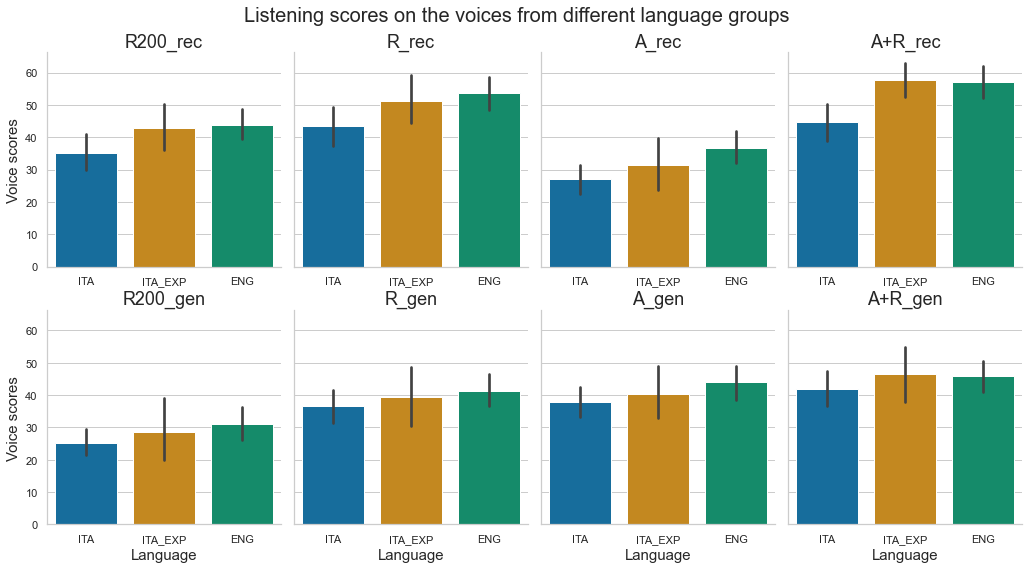

In [75]:
plt.figure(figsize=(20, 5))
sns.set_style("whitegrid")
g = sns.FacetGrid(df1, col="voice", height=4, aspect=.9,col_wrap=4, margin_titles=True, sharex = False)

g.map(sns.barplot, "language", "voice_score", order=["ITA", "ITA_EXP", "ENG"], palette="colorblind")


# sns.boxplot(x="voice", y="voice_score", hue="language",
#                  data=df1, linewidth=2.5);

#plt.legend(fontsize='x-large', title_fontsize='40')

#g.legend(fontsize='x-large',title_fontsize='20', title='Language', loc='upper right')

#plt.ylabel('Language', fontsize=14)
#g.set_xlabel('X_axi',fontsize=20)
g.set_xlabels("Language", size=15)
g.set_ylabels("Voice scores", size=15)

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Listening scores on the voices from different language groups", size=20)

g.set_titles('{col_name}', size=18)
plt.savefig("barplot_voices.pdf")

In [25]:
# see if it's significant difference

lm = ols('voice_score ~ C (language) * C (type)', data=df1).fit()
#print(lm.summary())

# Seeing if the overall model is significant
print(f"\nOverall model F({lm.df_model: .0f},{lm.df_resid: .0f}) = {lm.fvalue: .3f}, p = {lm.f_pvalue: .4f}")


# Creates the ANOVA table
aov_table = sm.stats.anova_lm(lm, typ=2)
print(aov_table.round(4))

#mc = statsmodels.stats.multicomp.MultiComparison(df1['voice'],df1['language'])

mc_language = statsmodels.stats.multicomp.MultiComparison(df1['voice_score'],df1['language'])
mc_lang = mc_language.tukeyhsd()
print()
print(mc_lang)

mc_type = statsmodels.stats.multicomp.MultiComparison(df1['voice_score'],df1['type'])
mc_ty = mc_type.tukeyhsd()
print()
print(mc_ty)

mc_voice = statsmodels.stats.multicomp.MultiComparison(df1['voice_score'],df1['voice'])
mc_v = mc_voice.tukeyhsd()
print()
print(mc_v)



Overall model F( 5, 674) =  9.461, p =  0.0000
                          sum_sq     df        F  PR(>F)
C(language)            8450.3175    2.0  13.9602  0.0000
C(type)                4858.3379    1.0  16.0523  0.0001
C(language):C(type)    1008.6748    2.0   1.6664  0.1897
Residual             203991.0677  674.0      NaN     NaN

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2 meandiff p-adj   lower   upper  reject
-----------------------------------------------------
   ENG     ITA  -7.6958  0.001 -11.2255 -4.166   True
   ENG ITA_EXP  -1.8138 0.5867  -6.1887 2.5612  False
   ITA ITA_EXP    5.882  0.006   1.4051 10.359   True
-----------------------------------------------------

Multiple Comparison of Means - Tukey HSD, FWER=0.05
 group1 group2 meandiff p-adj lower  upper  reject
--------------------------------------------------
general recipe   5.3459 0.001 2.6739 8.0179   True
--------------------------------------------------

   Multiple Comparison of Mean

In [25]:
# assumptions
### Normality Assumption check
w, pvalue = stats.shapiro(lm.resid)
print(w, pvalue)

0.9902575612068176 7.3694955062819645e-06


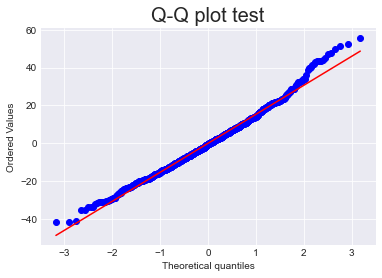

In [30]:
plt.style.use('seaborn-darkgrid')
stats.probplot(lm.resid, plot=plt)
plt.title("Q-Q plot test", size=20)
plt.savefig("assumption_qq.pdf")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


AttributeError: 'AxesSubplot' object has no attribute 'savefig'

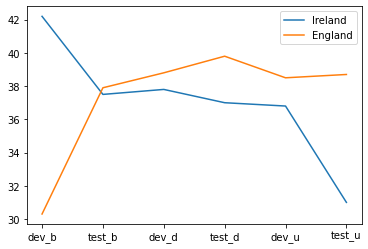

In [3]:
    df = pd.DataFrame({
       'Ireland': [42.2, 37.5, 37.8, 37.0, 36.8, 31.0],
       'England': [30.3, 37.9, 38.8, 39.8, 38.5, 38.7]
       }, index=['dev_b', 'test_b', 'dev_d', 'test_d', 'dev_u', 'test_u'])

    lines = df.plot.line()
    lines.savefig("/Users/macbookpro/Desktop/UNIVERSITY OF EDINBURGH/DISSERTATION/WER_accents.pdf")